In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#reading the train dataset
df = pd.read_csv('../dataset/train.csv')

In [3]:
#checking the shape
df.shape

(28200, 22)

In [4]:
#quick info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

#### Fixing the data types

In [5]:
#converting datetime dtype from object to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
#function to check %null values columnwise in the dataframe
def check_null(df):
    nulls = 100*df.isnull().sum()/len(df)
    nulls.sort_values(ascending=False,inplace=True)
    return round(nulls,2)

In [7]:
#checking the null values
check_null(df)

wind_direction(°)                 18.10
blade_length(m)                   18.06
atmospheric_temperature(°C)       12.23
atmospheric_pressure(Pascal)       9.60
windmill_body_temperature(°C)      8.38
turbine_status                     6.24
rotor_torque(N-m)                  2.03
windmill_height(m)                 1.93
cloud_level                        0.98
wind_speed(m/s)                    0.97
blades_angle(°)                    0.77
windmill_generated_power(kW/h)     0.73
motor_torque(N-m)                  0.09
engine_temperature(°C)             0.04
generator_temperature(°C)          0.04
shaft_temperature(°C)              0.01
resistance(ohm)                    0.00
gearbox_temperature(°C)            0.00
blade_breadth(m)                   0.00
tracking_id                        0.00
datetime                           0.00
area_temperature(°C)               0.00
dtype: float64

In [8]:
#looking at the top 5 rows
df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


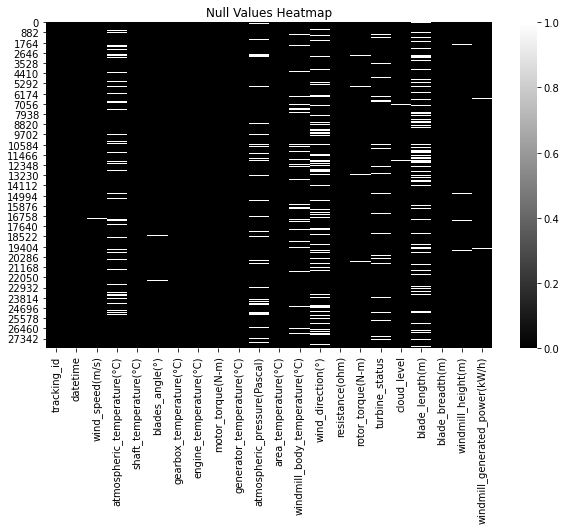

In [9]:
#Visualizing the null values
plt.figure(figsize=(10,6))
plt.title("Null Values Heatmap")
sb.heatmap(df.isnull(),cmap='gray')
plt.show()

### dropping the rows where target is null i.e. where ```windmill_generated_power(kW/h)``` is null

In [10]:
df2 = df[~df['windmill_generated_power(kW/h)'].isnull()]
df2.reset_index(inplace=True, drop=True)

In [11]:
#again checking the null values
check_null(df2)

wind_direction(°)                 18.07
blade_length(m)                   18.07
atmospheric_temperature(°C)       12.22
atmospheric_pressure(Pascal)       9.61
windmill_body_temperature(°C)      8.40
turbine_status                     6.24
rotor_torque(N-m)                  2.03
windmill_height(m)                 1.92
cloud_level                        0.97
wind_speed(m/s)                    0.97
blades_angle(°)                    0.76
motor_torque(N-m)                  0.09
generator_temperature(°C)          0.04
engine_temperature(°C)             0.04
shaft_temperature(°C)              0.01
resistance(ohm)                    0.00
gearbox_temperature(°C)            0.00
blade_breadth(m)                   0.00
tracking_id                        0.00
area_temperature(°C)               0.00
datetime                           0.00
windmill_generated_power(kW/h)     0.00
dtype: float64

### First Handling the Categorical variables with null values

In [12]:
check_null(df2.select_dtypes(include='object'))

turbine_status    6.24
cloud_level       0.97
tracking_id       0.00
dtype: float64

In [13]:
df2['cloud_level'].value_counts()

Low              13824
Medium           13598
Extremely Low      299
Name: cloud_level, dtype: int64

In [14]:
#mode imputation
df2['cloud_level'] = df2['cloud_level'].fillna('Medium')

In [15]:
#label encoding cloud_level
df2['cloud_level'] = df2['cloud_level'].map({'Extremely Low':0, 'Low':1, 'Medium':2})

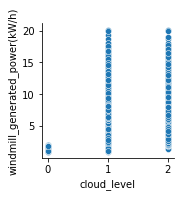

In [16]:
sb.pairplot(df2,x_vars=['cloud_level'], y_vars=['windmill_generated_power(kW/h)'])

In [17]:
df2['turbine_status'].value_counts()

BB     1930
AAA    1925
BCB    1920
B2     1918
A      1914
D      1907
B      1870
AB     1855
ABC    1855
AC     1841
A2     1840
BA     1835
BD     1830
BBB    1806
Name: turbine_status, dtype: int64

In [18]:
#Target-Mean encoding turbine_status
turbine_status_map = (df2.groupby('turbine_status')['windmill_generated_power(kW/h)'].mean()).to_dict()
turbine_status_map

{'A': 6.289960544273244,
 'A2': 6.19022618237202,
 'AAA': 6.1960386972952,
 'AB': 6.110645760148434,
 'ABC': 6.10050915087788,
 'AC': 6.1071485067949896,
 'B': 6.058010794793783,
 'B2': 6.191467892067386,
 'BA': 6.05525632066571,
 'BB': 6.141434930841949,
 'BBB': 6.085857062607032,
 'BCB': 6.134204342914045,
 'BD': 6.0620274158345,
 'D': 6.100055331803151}

In [19]:
#imputing the 'turbine_status' column
df2['turbine_status'] =df2['turbine_status'].map(turbine_status_map)

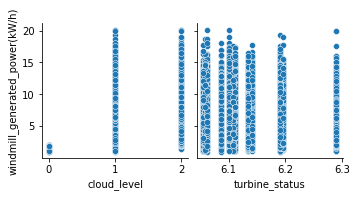

In [20]:
sb.pairplot(df2,x_vars=['cloud_level','turbine_status'], y_vars=['windmill_generated_power(kW/h)'])

## Imputing Missing Values Using KNN Imputer

In [21]:
#tracking_id and datetime are not necessary for the prediction
X = df2.drop(['tracking_id','datetime','windmill_generated_power(kW/h)'], axis=1)
X.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,6.055256,2,2.217542,0.314065,24.281689
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,6.190226,2,4.210346,0.448494,27.262139
2,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,6.100509,2,2.719475,0.302321,27.366127
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,6.100509,2,4.857385,0.367140,24.287767
4,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,6.196039,2,NaN,0.453374,27.971650


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27993 entries, 0 to 27992
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wind_speed(m/s)                27722 non-null  float64
 1   atmospheric_temperature(°C)    24571 non-null  float64
 2   shaft_temperature(°C)          27991 non-null  float64
 3   blades_angle(°)                27781 non-null  float64
 4   gearbox_temperature(°C)        27992 non-null  float64
 5   engine_temperature(°C)         27981 non-null  float64
 6   motor_torque(N-m)              27969 non-null  float64
 7   generator_temperature(°C)      27981 non-null  float64
 8   atmospheric_pressure(Pascal)   25303 non-null  float64
 9   area_temperature(°C)           27993 non-null  float64
 10  windmill_body_temperature(°C)  25641 non-null  float64
 11  wind_direction(°)              22935 non-null  float64
 12  resistance(ohm)                27992 non-null 

In [23]:
#importing KNN Imputer
from sklearn.impute import KNNImputer

In [24]:
imputer = KNNImputer()

In [25]:
%%time
X_imputed = imputer.fit_transform(X)

Wall time: 1min


In [26]:
#since X_imputed is a numpy array, so forming the DataFrame
df3 = pd.DataFrame(X_imputed,columns=X.columns)
df3.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,39.371276,239.836388,2730.310605,42.084666,6.055256,2.0,2.217542,0.314065,24.281689
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,26.625569,337.944723,1780.207200,107.888643,6.190226,2.0,4.210346,0.448494,27.262139
2,95.484724,-3.220323,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,6.100509,2.0,2.719475,0.302321,27.366127
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,6.100509,2.0,4.857385,0.367140,24.287767
4,10.722890,-14.221383,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,6.196039,2.0,4.524332,0.453374,27.971650


In [27]:
#Adding the Target column in the DataFrame
df3['windmill_generated_power(kW/h)'] = df2['windmill_generated_power(kW/h)']

In [28]:
#all null values are imputed
check_null(df3)

wind_speed(m/s)                   0.0
atmospheric_temperature(°C)       0.0
windmill_height(m)                0.0
blade_breadth(m)                  0.0
blade_length(m)                   0.0
cloud_level                       0.0
turbine_status                    0.0
rotor_torque(N-m)                 0.0
resistance(ohm)                   0.0
wind_direction(°)                 0.0
windmill_body_temperature(°C)     0.0
area_temperature(°C)              0.0
atmospheric_pressure(Pascal)      0.0
generator_temperature(°C)         0.0
motor_torque(N-m)                 0.0
engine_temperature(°C)            0.0
gearbox_temperature(°C)           0.0
blades_angle(°)                   0.0
shaft_temperature(°C)             0.0
windmill_generated_power(kW/h)    0.0
dtype: float64

In [29]:
df3.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,39.371276,239.836388,2730.310605,42.084666,6.055256,2.0,2.217542,0.314065,24.281689,6.766521
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,26.625569,337.944723,1780.207200,107.888643,6.190226,2.0,4.210346,0.448494,27.262139,5.966275
2,95.484724,-3.220323,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,6.100509,2.0,2.719475,0.302321,27.366127,2.874342
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,6.100509,2.0,4.857385,0.367140,24.287767,14.851089
4,10.722890,-14.221383,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,6.196039,2.0,4.524332,0.453374,27.971650,3.519074


In [30]:
df4 = pd.concat([df2[['tracking_id','datetime']], df3], axis=1)

In [31]:
df4.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,39.371276,239.836388,2730.310605,42.084666,6.055256,2.0,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,26.625569,337.944723,1780.207200,107.888643,6.190226,2.0,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,-3.220323,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,6.100509,2.0,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,6.100509,2.0,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,-14.221383,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,6.196039,2.0,4.524332,0.453374,27.971650,3.519074


## Saving Preprocessed Train Data

In [32]:
df4.to_csv('../dataset/train_imputed.csv',index=False)

# PrePrcessing on Test Data

In [33]:
#reading the test.csv
test = pd.read_csv('../dataset/test.csv')

In [34]:
#checking the shape of data
test.shape

(12086, 21)

In [35]:
#Quick info of the data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    12086 non-null  object 
 1   datetime                       12086 non-null  object 
 2   wind_speed(m/s)                11960 non-null  float64
 3   atmospheric_temperature(°C)    10659 non-null  float64
 4   shaft_temperature(°C)          12085 non-null  float64
 5   blades_angle(°)                11980 non-null  float64
 6   gearbox_temperature(°C)        12085 non-null  float64
 7   engine_temperature(°C)         12081 non-null  float64
 8   motor_torque(N-m)              12075 non-null  float64
 9   generator_temperature(°C)      12081 non-null  float64
 10  atmospheric_pressure(Pascal)   10935 non-null  float64
 11  area_temperature(°C)           12085 non-null  float64
 12  windmill_body_temperature(°C)  11160 non-null 

#### Fixing the data types

In [36]:
#converting datetime dtype from object to datetime
test['datetime'] = pd.to_datetime(test['datetime'])

In [37]:
#checking the null values
check_null(test)

wind_direction(°)                17.87
blade_length(m)                  17.49
atmospheric_temperature(°C)      11.81
atmospheric_pressure(Pascal)      9.52
windmill_body_temperature(°C)     7.66
turbine_status                    6.59
rotor_torque(N-m)                 2.33
windmill_height(m)                2.11
wind_speed(m/s)                   1.04
cloud_level                       1.03
blades_angle(°)                   0.88
motor_torque(N-m)                 0.09
generator_temperature(°C)         0.04
engine_temperature(°C)            0.04
area_temperature(°C)              0.01
gearbox_temperature(°C)           0.01
shaft_temperature(°C)             0.01
datetime                          0.00
resistance(ohm)                   0.00
blade_breadth(m)                  0.00
tracking_id                       0.00
dtype: float64

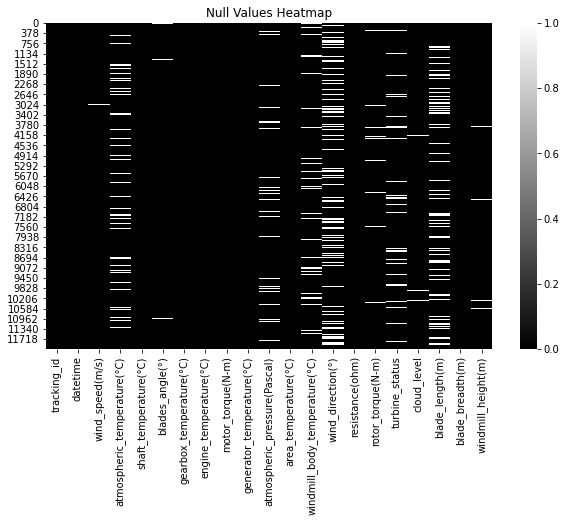

In [38]:
#Visualizing the null vlaues
plt.figure(figsize=(10,6))
plt.title('Null Values Heatmap')
sb.heatmap(test.isnull(),cmap='gray')
plt.show()

### Handling Categorical variables

In [39]:
check_null(test.select_dtypes(include='object'))

turbine_status    6.59
cloud_level       1.03
tracking_id       0.00
dtype: float64

In [40]:
test['cloud_level'].value_counts()

Low              5932
Medium           5893
Extremely Low     136
Name: cloud_level, dtype: int64

In [41]:
#mode imputation same as in the train set
test['cloud_level'] = test['cloud_level'].fillna('Medium')

In [42]:
#label encoding cloud_level as we did in train-set
test['cloud_level'] = test['cloud_level'].map({'Extremely Low':0, 'Low':1, 'Medium':2})

In [43]:
test['turbine_status'].value_counts()

BB     871
B2     859
A      852
BBB    813
BCB    811
BA     809
AB     804
A2     796
ABC    787
BD     787
D      786
AC     778
AAA    773
B      763
Name: turbine_status, dtype: int64

In [44]:
# Encoding the turbine_status same mapping as in the train-set
test['turbine_status'] =test['turbine_status'].map(turbine_status_map)

In [45]:
#looking at the top 5 records
test.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,6.055256,2,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,6.289961,2,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,6.191468,2,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,6.085857,1,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,6.289961,1,3.549672,0.368355,4.885440


In [46]:
X_test = test.drop(['tracking_id', 'datetime'],axis=1)

In [47]:
#Imputing remaining null values using KNNImputer
test_imputer = KNNImputer()

In [48]:
%%time
X_test_imputed = imputer.fit_transform(X_test)

Wall time: 11 s


In [49]:
test2 = pd.DataFrame(X_test_imputed,columns=X_test.columns)
test2.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,6.055256,2.0,3.185837,0.403965,25.572431
1,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,110971.054135,29.431813,42.728174,499.595287,1165.111992,-35.050093,6.289961,2.0,3.016603,0.444755,24.371823
2,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,6.191468,2.0,2.611941,0.387368,27.654677
3,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,72612.484366,23.886434,13.501595,273.661928,1329.744740,15.245757,6.085857,1.0,2.866805,0.450478,24.189426
4,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,6.289961,1.0,3.549672,0.368355,4.885440


In [50]:
test3 = pd.concat([test[['tracking_id', 'datetime']], test2],axis=1)
test3.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,6.055256,2.0,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,6.289961,2.0,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,6.191468,2.0,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,273.661928,1329.744740,15.245757,6.085857,1.0,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,6.289961,1.0,3.549672,0.368355,4.885440


In [51]:
#saving the train-PreProcessed file
test3.to_csv('../dataset/test_imputed.csv',index=False)